In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
!pip install geopandas

     |████████████████████████████████| 931kB 11.0MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 28.0MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 28.0MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 28.8MB/s eta 0:00:01    |▊                               | 256kB 28.8MB/s eta 0:00:01


In [4]:
!pip install folium

     |████████████████████████████████| 102kB 7.4MB/s ta 0:00:011


# LOCATION ANALYSIS FOR A NEW RESTAURANT IN BRISBANE

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

As a capital city of Queensland State, the third most populous city in Australia after Sydney and Melbourne, Brisbane offers a more manageable lifestyle and affordable cost of living. The city is known as one of Australian’s major business hubs with strengths in mining, banking, transportation, information technology and food that create jobs and business opportunities. City residents are spoilt with restaurants and dining establishments including outdoor dining, food trucks and roof-top bars.

In today’s tight competition, choosing a right location for business can be crucial but it requires research and planning about the area, demographic and market profiles of the location. It becomes a balancing act, for investors who are interested to open a restaurant in Brisbane area, between spending time and money undertaking proper assessment to choose a location and starting a business itself. This location analysis provides a high-level overview of suburb within close proximity to Brisbane CBD presenting information and insight through data visualisation for investors considering locations for their new restaurants.

## Data <a name="data"></a>

Data used for this analysis includes:

 * Locality boundaries dataset from Queensland Government consists of spatial representation of boundary areas for suburbs;
 * Decile Index (suburb profile) originated from Australian Bureau Statistics (ABS) indicates relative socio-economic and demographic profiles of suburbs derived from Australian census data;
 * Data on venues in suburbs from Foursquare used to capture information about geographic location, category, and popularity, and provide insight about potential competitions or/and restaurant opportunities.

#### GEODATA

In [5]:
#Bring libraries
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import json
import folium
print('ready!')

ready!


In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
map = folium.Map(
    location=[-27.466829, 153.027374],
    zoom_start=13
)

folium.GeoJson(
    jsfile,
    name='geojson'
).add_to(map)
map

Geospatial boundary areas for suburbs near Brisbane in a .shp format is sourced and downloaded Australian Bureau Statistics (ABS) website.
Only suburbs within 10 kilometres radius from Brisbane as a city centre selected and included in this analysis. 
Centroids of polygon boundary geometries were calculated using Python, generating latitude (centr_lat) and longitude (centr_lon) information used to plot the data.

Let's now create geopandas dataframe out of geojson file to see its information attributes

In [9]:
bnefile = project.get_file('bnegeo.geojson')
geodata = gpd.read_file(bnefile)
geodata.head()

,suburb,decile,centr_lon,centr_lat,geometry
0,Murarrie,8,153.108225,-27.454160,"POLYGON ((153.11606 -27.44674, 153.11606 -27.4..."
1,Tingalpa,7,153.127041,-27.473598,"POLYGON ((153.11540 -27.46355, 153.11541 -27.4..."
2,Everton Park,7,152.987377,-27.400759,"POLYGON ((152.97981 -27.40682, 152.97980 -27.4..."
3,McDowall,10,152.991757,-27.382429,"POLYGON ((152.98134 -27.37961, 152.98123 -27.3..."
4,Chermside,4,153.032091,-27.385374,"POLYGON ((153.03537 -27.37986, 153.03602 -27.3..."


In [10]:
# Testing the first row from the geofile dataframe to make sure returned values are as expected
sublat = geodata.loc[0, 'centr_lat'] # neighborhood latitude value
sublon = geodata.loc[0, 'centr_lon'] # neighborhood longitude value
subname = geodata.loc[0, 'suburb'] # suburb name

print('Latitude and longitude values of {} are {}, {}.'.format(subname, sublat, sublon))

Latitude and longitude values of Murarrie are -27.45415955300493, 153.10822521851998.


#### VENUE DATA

Use Foursquare to gather information about venues near Brisbane area.

In [11]:
# The code was removed by Watson Studio for sharing.

In [15]:
import requests
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    sublat, 
    sublon, 
    radius,
    LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee16204363953691982d134'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Murrarie',
  'headerFullLocation': 'Murrarie, Brisbane',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': -27.449659548504926,
    'lng': 153.11328686356856},
   'sw': {'lat': -27.458659557504937, 'lng': 153.1031635734714}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e28d1dbfa762797e5a1cc4b',
       'name': '7-Eleven',
       'location': {'address': '887 Lytton Rd.',
        'lat': -27.456864177580893,
        'lng': 153.10571047150788,
        'labeledLatLngs': [{'label': 'display',
          'lat': -27.456864

Extract category of a given venue

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now create a dataframe for the venue data

In [17]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_bnevenues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_bnevenues =nearby_bnevenues.loc[:, filtered_columns]

# filter the category for each row
nearby_bnevenues['venue.categories'] = nearby_bnevenues.apply(get_category_type, axis=1)

# clean columns
nearby_bnevenues.columns = [col.split(".")[-1] for col in nearby_bnevenues.columns]

nearby_bnevenues.head()

,name,categories,lat,lng
0,7-Eleven,Convenience Store,-27.456864,153.105710
1,Rivergate Marina,Harbor / Marina,-27.453302,153.107398
2,QX Labour,Event Service,-27.450552,153.109460
3,The Workers Kitchen,Sandwich Place,-27.458241,153.107007


Find out how many venues returned from Foursquare

In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_bnevenues.shape[0]))

4 venues were returned by Foursquare.


Explore all venues surrounding listed suburbs

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    venuedata = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venuedata.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(venuedata)

In [21]:
venue_df = getNearbyVenues(names=geodata['suburb'],
                                   latitudes=geodata['centr_lat'],
                                   longitudes=geodata['centr_lon']
                                  )
print(venue_df.shape)
venue_df.head(3)

Murarrie
Tingalpa
Everton Park
McDowall
Chermside
Chermside West
Kedron - Gordon Park
Stafford
Stafford Heights
Wavell Heights
Eagle Farm - Pinkenba
Northgate - Virginia
Nundah
Camp Hill
Cannon Hill
Carina
Carina Heights
Annerley
Coorparoo
Fairfield - Dutton Park
Greenslopes
Holland Park
Holland Park West
Woolloongabba
Yeronga
Moorooka
Tarragindi
Chapel Hill
Fig Tree Pocket
Chelmer - Graceville
Indooroopilly
Sherwood
St Lucia
Taringa
Enoggera
Keperra
Mitchelton
The Gap
Upper Kedron - Ferny Grove
Brisbane City
Fortitude Valley
Highgate Hill
Kangaroo Point
New Farm
South Brisbane
Spring Hill
West End
East Brisbane
Hawthorne
Morningside - Seven Hills
Norman Park
Albion
Alderley
Ascot
Clayfield
Grange
Hamilton (Qld)
Hendra
Kelvin Grove - Herston
Newmarket
Newstead - Bowen Hills
Wilston
Windsor
Wooloowin - Lutwyche
Ashgrove
Auchenflower
Bardon
Paddington - Milton
Red Hill (Qld)
Toowong
Bulimba - Balmoral
(815, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Murarrie,-27.45416,153.108225,7-Eleven,-27.456864,153.105710,Convenience Store
1,Murarrie,-27.45416,153.108225,Rivergate Marina,-27.453302,153.107398,Harbor / Marina
2,Murarrie,-27.45416,153.108225,QX Labour,-27.450552,153.109460,Event Service


In [22]:
#Let's check how many venues were returned for each neighborhood
venue_df.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Albion,12,12,12,12,12,12
Alderley,6,6,6,6,6,6
Annerley,9,9,9,9,9,9
Ascot,11,11,11,11,11,11
Ashgrove,2,2,2,2,2,2
Auchenflower,6,6,6,6,6,6
Bardon,3,3,3,3,3,3
Brisbane City,65,65,65,65,65,65
Bulimba - Balmoral,20,20,20,20,20,20


In [23]:
#Also find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(venue_df['Venue Category'].unique())))

There are 169 uniques categories.


## Methodology <a name="methodology"></a>

Popular unsupervised learning algorithm called K-means clustering is used for the analysis to create cluster groups of suburbs identified based on most popular venue. In order to use the algorithm, categorical values of venue data captured from Foursquare is converted into numerical values using One-Hot-Encoding from SciKit learn library.

#### ONE-HOT ENCODING FOR TOP 5 MOST COMMON VENUES

In [25]:
#Use one-hot encoding to calculate average frequency for each venue category
bne_onehot = pd.get_dummies(venue_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bne_onehot['Suburb'] = venue_df['Suburb'] 

# move neighborhood column to the first column
fixed_columns = [bne_onehot.columns[-1]] + list(bne_onehot.columns[:-1])
bne_onehot = bne_onehot[fixed_columns]

bne_onehot.shape

(815, 170)

In [26]:
#Group those venues based on suburbs
bne_grouped = bne_onehot.groupby('Suburb').mean().reset_index()

bne_grouped.shape
bne_grouped.head()

,Suburb,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Albion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,...,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alderley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Annerley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ascot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ashgrove,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
#create the new dataframe and display the top 5 venues for each neighborhood
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Suburb'] = bne_grouped['Suburb']

for ind in np.arange(bne_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(bne_grouped.iloc[ind, :], num_top_venues)

venues_sorted.tail()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
66,Wilston,Café,Breakfast Spot,Ice Cream Shop,Bakery,Coffee Shop
67,Windsor,Bus Station,Pharmacy,Fish & Chips Shop,Hotel,Vegetarian / Vegan Restaurant
68,Woolloongabba,Coffee Shop,Laser Tag,Bakery,Paper / Office Supplies Store,Pharmacy
69,Wooloowin - Lutwyche,Park,Cafeteria,Pub,Café,Yoga Studio
70,Yeronga,Park,Convenience Store,Coffee Shop,Yoga Studio,Event Space


#### K-MEANS CLUSTERING

In [33]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [31]:
bnegroup_cluster = bne_grouped
bnegroup_cluster = bnegroup_cluster.drop('Suburb', 1)
bnegroup_cluster.head(2)

,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,...,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After testing different variation of k values, kclusters = 6 is found to be optimal

In [34]:
kclusters = 6
# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bnegroup_cluster)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([5, 0, 5, 5, 4, 5, 0, 5, 5, 0], dtype=int32)

Insert Cluster Label back into the dataframe and visualise the cluster data distribution using bar chart.

In [35]:
venues_sorted.insert(0, 'Cluster', kmeans.labels_)
venues_sorted.head()

,Cluster,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,5,Albion,Café,Liquor Store,Cricket Ground,Sporting Goods Shop,Comedy Club
1,0,Alderley,Pizza Place,Grocery Store,Supermarket,Thai Restaurant,Train Station
2,5,Annerley,Café,Pizza Place,Camera Store,Sandwich Place,Supermarket
3,5,Ascot,Pizza Place,Burger Joint,Thai Restaurant,Flea Market,Café
4,4,Ashgrove,Park,Bus Station,Yoga Studio,Event Space,Flower Shop


In [36]:
#create a new dataframe for bar chart by grouping number of venues recorded within each suburb
venues_bar = venues_sorted.groupby("Cluster").count().iloc[:,0:1].reset_index().rename(columns = {"Suburb" : "Counts"}).sort_values(by = 'Counts', ascending = False).reset_index().drop("index", axis = 1)
venues_bar

,Cluster,Counts
0,5,35
1,0,30
2,4,3
3,1,1
4,2,1
5,3,1


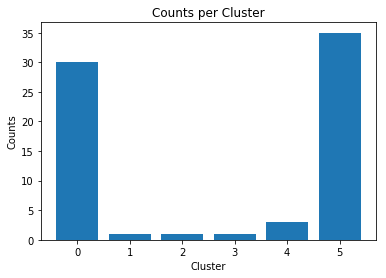

In [38]:
height = venues_bar['Counts'].values
bars = venues_bar['Cluster'].values
y_pos = np.arange(len(venues_bar))

plt.bar(bars,height)
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.title('Counts per Cluster')

plt.show()

Join the venue data and geodata based on suburb to get location coordinates for plotting on folium

In [39]:
bnedata = venues_sorted
bnedata = pd.merge(venues_sorted, geodata, left_on='Suburb',right_on='suburb',how='right')
bnedata.head()

,Cluster,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,suburb,decile,centr_lon,centr_lat,geometry
0,5,Albion,Café,Liquor Store,Cricket Ground,Sporting Goods Shop,Comedy Club,Albion,8,153.044469,-27.432555,"POLYGON ((153.04247 -27.42560, 153.04240 -27.4..."
1,0,Alderley,Pizza Place,Grocery Store,Supermarket,Thai Restaurant,Train Station,Alderley,9,153.001018,-27.425527,"POLYGON ((152.99178 -27.43193, 152.99199 -27.4..."
2,5,Annerley,Café,Pizza Place,Camera Store,Sandwich Place,Supermarket,Annerley,7,153.032477,-27.512279,"POLYGON ((153.02916 -27.52314, 153.02866 -27.5..."
3,5,Ascot,Pizza Place,Burger Joint,Thai Restaurant,Flea Market,Café,Ascot,9,153.066089,-27.429866,"POLYGON ((153.06136 -27.42337, 153.06228 -27.4..."
4,4,Ashgrove,Park,Bus Station,Yoga Studio,Event Space,Flower Shop,Ashgrove,10,152.981906,-27.444289,"POLYGON ((152.99178 -27.43193, 152.99265 -27.4..."


In [42]:
import matplotlib.cm as cm
import matplotlib.colors as colors

Plot venue cluster data on folium

In [47]:
latitude = -27.466829
longitude = 153.027374

# create map
mapcluster = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bnedata['centr_lat'], bnedata['centr_lon'], bnedata['Suburb'], bnedata['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mapcluster)
       
mapcluster

#### CLUSTER REVIEW

Explore categories for each cluster

#### Cluster 0

In [50]:
bnedata.loc[bnedata['Cluster'] == 0, bnedata.columns[[1,2] + list(range(3, bnedata.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,suburb,decile,centr_lon,centr_lat,geometry
1,Alderley,Pizza Place,Grocery Store,Supermarket,Thai Restaurant,Train Station,Alderley,9,153.001018,-27.425527,"POLYGON ((152.99178 -27.43193, 152.99199 -27.4..."
6,Bardon,Music Venue,Playground,Convenience Store,Event Service,Flea Market,Bardon,10,152.979205,-27.460995,"POLYGON ((152.99192 -27.46549, 152.99225 -27.4..."
9,Camp Hill,Pizza Place,Ice Cream Shop,Deli / Bodega,Bistro,Shopping Mall,Camp Hill,10,153.078002,-27.496307,"POLYGON ((153.07522 -27.50337, 153.07528 -27.5..."
10,Cannon Hill,Shopping Mall,Coffee Shop,Liquor Store,Fast Food Restaurant,Supermarket,Cannon Hill,7,153.094747,-27.472372,"POLYGON ((153.09526 -27.47500, 153.09442 -27.4..."
11,Carina,Athletics & Sports,Hockey Field,Bus Station,Convenience Store,Yoga Studio,Carina,8,153.098791,-27.487556,"POLYGON ((153.08833 -27.47762, 153.08826 -27.4..."
12,Carina Heights,Women's Store,Asian Restaurant,Coffee Shop,Thai Restaurant,Italian Restaurant,Carina Heights,6,153.091260,-27.507211,"POLYGON ((153.09438 -27.49582, 153.09509 -27.4..."
15,Chermside,Electronics Store,Fast Food Restaurant,Café,Department Store,Multiplex,Chermside,4,153.032091,-27.385374,"POLYGON ((153.03537 -27.37986, 153.03602 -27.3..."
16,Chermside West,Park,Vietnamese Restaurant,Coffee Shop,Indian Restaurant,Yoga Studio,Chermside West,8,153.012504,-27.383211,"POLYGON ((153.00197 -27.38973, 153.00249 -27.3..."
17,Clayfield,Fried Chicken Joint,Gym,Grocery Store,Sushi Restaurant,Train Station,Clayfield,9,153.054440,-27.419150,"POLYGON ((153.04791 -27.41726, 153.04808 -27.4..."
19,Eagle Farm - Pinkenba,Fast Food Restaurant,Factory,Rental Car Location,Golf Course,Yoga Studio,Eagle Farm - Pinkenba,2,153.096474,-27.434836,"POLYGON ((153.11780 -27.42490, 153.11764 -27.4..."


Most common venues visited in Cluster 0 are large stores, and it is also based on the fact those suburb areas are relatively large. Cluster 0 will be labeled as Large Stores.

#### Cluster 1

In [57]:
bnedata.loc[bnedata['Cluster'] == 1, bnedata.columns[[1,2] + list(range(3, bnedata.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,suburb,decile,centr_lon,centr_lat,geometry
20,East Brisbane,Pub,Yoga Studio,Event Service,Flower Shop,Flea Market,East Brisbane,8,153.047013,-27.48412,"POLYGON ((153.04137 -27.47893, 153.04148 -27.4..."


Cluster 1 only has one feature, and venue types vary from pub to fresh market. The area is quite popular with pubs and bars so for this analysis, cluster 1 will be labelled as Pubs and Bars.

#### Cluster 2

In [52]:
bnedata.loc[bnedata['Cluster'] == 2, bnedata.columns[[1,2] + list(range(3, bnedata.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,suburb,decile,centr_lon,centr_lat,geometry
24,Fig Tree Pocket,Kids Store,Yoga Studio,Factory,Food Court,Flower Shop,Fig Tree Pocket,10,152.961899,-27.527845,"POLYGON ((152.96866 -27.52220, 152.96870 -27.5..."


To classify venue types found in this particular suburb, this cluster will be labelled as General Stores.

#### Cluster 3

In [53]:
bnedata.loc[bnedata['Cluster'] == 3, bnedata.columns[[1,2] + list(range(3, bnedata.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,suburb,decile,centr_lon,centr_lat,geometry
13,Chapel Hill,Liquor Store,Factory,French Restaurant,Food Court,Flower Shop,Chapel Hill,10,152.948379,-27.498884,"POLYGON ((152.93815 -27.49974, 152.93818 -27.4..."


Another cluster that only has one suburb that has different types of stores, this cluster will be labelled as Special Stores.

#### Cluster 4

In [54]:
bnedata.loc[bnedata['Cluster'] == 4, bnedata.columns[[1,2] + list(range(3, bnedata.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,suburb,decile,centr_lon,centr_lat,geometry
4,Ashgrove,Park,Bus Station,Yoga Studio,Event Space,Flower Shop,Ashgrove,10,152.981906,-27.444289,"POLYGON ((152.99178 -27.43193, 152.99265 -27.4..."
33,Holland Park West,Bus Station,Asian Restaurant,Restaurant,Gas Station,Yoga Studio,Holland Park West,9,153.060458,-27.526247,"POLYGON ((153.06807 -27.52536, 153.06873 -27.5..."
63,Upper Kedron - Ferny Grove,Bus Station,Yoga Studio,Factory,Food Court,Flower Shop,Upper Kedron - Ferny Grove,10,152.920595,-27.414334,"POLYGON ((152.90444 -27.43193, 152.90451 -27.4..."


This cluster will be classified as Service Stores.

#### Cluster 5

In [55]:
bnedata.loc[bnedata['Cluster'] == 5, bnedata.columns[[1,2] + list(range(3, bnedata.shape[1]))]]

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,suburb,decile,centr_lon,centr_lat,geometry
0,Albion,Café,Liquor Store,Cricket Ground,Sporting Goods Shop,Comedy Club,Albion,8,153.044469,-27.432555,"POLYGON ((153.04247 -27.42560, 153.04240 -27.4..."
2,Annerley,Café,Pizza Place,Camera Store,Sandwich Place,Supermarket,Annerley,7,153.032477,-27.512279,"POLYGON ((153.02916 -27.52314, 153.02866 -27.5..."
3,Ascot,Pizza Place,Burger Joint,Thai Restaurant,Flea Market,Café,Ascot,9,153.066089,-27.429866,"POLYGON ((153.06136 -27.42337, 153.06228 -27.4..."
5,Auchenflower,Pizza Place,Restaurant,Coffee Shop,Mexican Restaurant,Thai Restaurant,Auchenflower,10,152.995109,-27.473841,"POLYGON ((152.99246 -27.47910, 152.99289 -27.4..."
7,Brisbane City,Café,Coffee Shop,Japanese Restaurant,Hotel,Korean Restaurant,Brisbane City,9,153.022722,-27.468120,"POLYGON ((153.02264 -27.47181, 153.02172 -27.4..."
8,Bulimba - Balmoral,Café,Coffee Shop,Sushi Restaurant,Italian Restaurant,Mexican Restaurant,Bulimba - Balmoral,10,153.062620,-27.451645,"POLYGON ((153.06315 -27.46025, 153.06316 -27.4..."
14,Chelmer - Graceville,Pizza Place,Japanese Restaurant,Athletics & Sports,Café,Ice Cream Shop,Chelmer - Graceville,10,152.978815,-27.517778,"POLYGON ((152.96931 -27.51935, 152.96913 -27.5..."
18,Coorparoo,Café,Bus Station,Yoga Studio,Factory,Flower Shop,Coorparoo,9,153.061519,-27.498899,"POLYGON ((153.05299 -27.50394, 153.05253 -27.5..."
21,Enoggera,Café,Yoga Studio,Factory,Food Court,Flower Shop,Enoggera,7,152.975396,-27.427146,"POLYGON ((152.98360 -27.40974, 152.98375 -27.4..."
23,Fairfield - Dutton Park,Park,Fish Market,Fish & Chips Shop,Train Station,Café,Fairfield - Dutton Park,7,153.024685,-27.502105,"POLYGON ((153.02299 -27.50098, 153.02299 -27.5..."


As cafes appear to be the most common venue for this cluster, it will be called Cafes and Restaurants.

We need to create geopanda dataframe to plot those 2 data together

In [79]:
bne_gpd = venues_sorted
bne_gpd = pd.merge(geodata, venues_sorted, left_on='suburb',right_on='Suburb',how='left')
bne_gpd.head()

,suburb,decile,centr_lon,centr_lat,geometry,Cluster,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Murarrie,8,153.108225,-27.454160,"POLYGON ((153.11606 -27.44674, 153.11606 -27.4...",0,Murarrie,Event Service,Harbor / Marina,Convenience Store,Sandwich Place,Event Space
1,Tingalpa,7,153.127041,-27.473598,"POLYGON ((153.11540 -27.46355, 153.11541 -27.4...",0,Tingalpa,Coffee Shop,Gym / Fitness Center,Kebab Restaurant,Pub,Mexican Restaurant
2,Everton Park,7,152.987377,-27.400759,"POLYGON ((152.97981 -27.40682, 152.97980 -27.4...",0,Everton Park,Bowling Green,Martial Arts Dojo,Sandwich Place,Medical Center,Food Court
3,McDowall,10,152.991757,-27.382429,"POLYGON ((152.98134 -27.37961, 152.98123 -27.3...",5,McDowall,Seafood Restaurant,Gym,Grocery Store,Bakery,Café
4,Chermside,4,153.032091,-27.385374,"POLYGON ((153.03537 -27.37986, 153.03602 -27.3...",0,Chermside,Electronics Store,Fast Food Restaurant,Café,Department Store,Multiplex


Add a new column for cluster description.

In [80]:
def desc (row):
    if row['Cluster'] == 0 :
        return 'Large Stores'
    if row['Cluster'] == 1  :
        return 'Pubs and Bars'
    if row['Cluster'] == 2  :
        return 'General Stores'
    if row['Cluster'] == 3  :
        return 'Special Stores'
    if row['Cluster'] == 4  :
        return 'Service Stores'
    return 'Cafes and Restaurants'
    
bne_gpd['Description'] = bne_gpd.apply (lambda row: desc(row), axis=1)
bne_gpd.head()

,suburb,decile,centr_lon,centr_lat,geometry,Cluster,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Description
0,Murarrie,8,153.108225,-27.454160,"POLYGON ((153.11606 -27.44674, 153.11606 -27.4...",0,Murarrie,Event Service,Harbor / Marina,Convenience Store,Sandwich Place,Event Space,Large Stores
1,Tingalpa,7,153.127041,-27.473598,"POLYGON ((153.11540 -27.46355, 153.11541 -27.4...",0,Tingalpa,Coffee Shop,Gym / Fitness Center,Kebab Restaurant,Pub,Mexican Restaurant,Large Stores
2,Everton Park,7,152.987377,-27.400759,"POLYGON ((152.97981 -27.40682, 152.97980 -27.4...",0,Everton Park,Bowling Green,Martial Arts Dojo,Sandwich Place,Medical Center,Food Court,Large Stores
3,McDowall,10,152.991757,-27.382429,"POLYGON ((152.98134 -27.37961, 152.98123 -27.3...",5,McDowall,Seafood Restaurant,Gym,Grocery Store,Bakery,Café,Cafes and Restaurants
4,Chermside,4,153.032091,-27.385374,"POLYGON ((153.03537 -27.37986, 153.03602 -27.3...",0,Chermside,Electronics Store,Fast Food Restaurant,Café,Department Store,Multiplex,Large Stores


#### THEMATIC MAPPING

Two data layers are created and presented as thematic map using Folium. The Decile Index layer shows colour-coded suburbs indicating relative socio-economic advantage, and the Cluster layer that displays colour-coded suburbs with different cluster groups.

In [81]:
from branca.colormap import linear
clustercolor = linear.YlOrRd_04.scale( 
    bnedata.Cluster.min(),
    bnedata.Cluster.max())

print(clustercolor(5.0))

#e31a1cff


In [85]:
bnevenue_map = folium.Map(location=[-27.466829, 153.027374],
                          zoom_start = 12, tiles='cartodbpositron')

folium.Choropleth(
    jsfile,
    name='Decile Index',
    data= bnedata,
    columns=['suburb', 'decile'],
    key_on='feature.properties.suburb',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Decile Index',
    line_color='white'
).add_to(bnevenue_map)

tooltip = folium.GeoJsonTooltip(
        fields=['suburb', 'Cluster','Description', 'decile'],
        aliases=['Suburb', 'Cluster', 'Category', 'Decile Index'],
        localize=True
)
folium.GeoJson(
    bne_gpd,
    name='Cluster',
    style_function = lambda x: {
    'fillColor': clustercolor(x['properties']['Cluster']),
    'color':'white',
    'weight': 0.5,
    'fillOpacity': 0.5
    },
    tooltip=tooltip
).add_to(bnevenue_map)

clustercolor.add_to(bnevenue_map)
clustercolor.caption="Cluster"
clustercolor.add_to(bnevenue_map)
folium.LayerControl().add_to(bnevenue_map)

bnevenue_map

## Results and Discussion <a name="results"></a>

An investor looking to open a new café will now be able to use the map, find those areas with dark blue colour (the highest decile index value) from the Decile Index map and identify areas in red (Cluster 5 Café and Restaurants) from the Cluster map indicating high concentration of cafés and restaurants. The investor will have the advantage to find other areas that have similar index values with less density of cafés and restaurants (less competition) by understanding distribution of analysis findings plotted on the map. 

Brisbane City shows a high density of cafes and restaurants (red colour) and has a decile index of 9 (dark blue colour). There are a few suburbs nearby that could be potential locations for a café or a restaurant where those areas still show high decile index such as Paddington-Milton and Fortitude Valley but not in cluster 5 (Cafes and Restaurants).

Detailed analysis is a necessary step when finalising a decision to choose an area for a new business. However this analysis which findings presented in a thematic map provides information that allow investors to assess areas of interests effectively.

## Conclusion <a name="conclusion"></a>

This analysis is aimed to provide a high level overview of areas suitable to open a new restaurant for investors who may not be familiar with Brisbane City and surrounding areas. Suburb profile data from ABS combined with information about venues from Foursquare are compiled and analysed to provide insight on potential suburbs to target. With data presented as a thematic map, investors are able to turn on/off the data layers to find areas of interest as a first step when choosing locations for business.

Final decision will be made with a more thorough and detailed analysis, and some consideration on other factors such as competition, access to locations, zoning regulations, and target market.